In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
fashionset=keras.datasets.fashion_mnist
(xtrain,ytrain),(xtest,ytest)=fashionset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


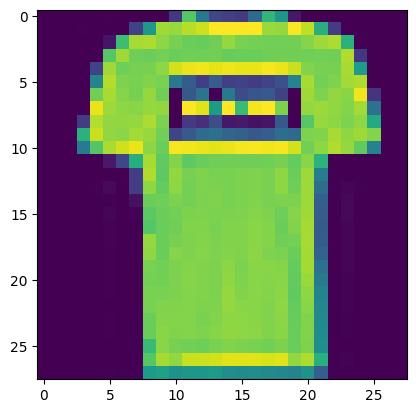

In [ ]:
plt.imshow(xtrain[1])

In [ ]:
xtrain[1].shape

(28, 28)

In [ ]:
ytrain[0]

9

In [ ]:
classname=["Tshirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [ ]:
classname[ytrain[2]]

'Tshirt/Top'

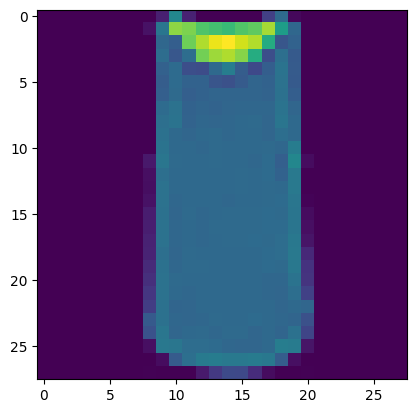

In [ ]:
plt.imshow(xtrain[2])

In [ ]:
xtrain[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 118,  24,   0,
          0,   0,   0,   0,  48,  88,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 100, 212, 205, 185,
        179, 173, 186, 193, 221, 142,  85,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  85,  76, 199, 225,
        248, 255, 238, 226, 157,  68,  80,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  91,  69,  91, 201,
        218, 225, 209, 158,  61,  93,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79,  89,  61,  59,
         87, 108,  75,  56,  76,  97,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  75,  89,  80,  80,
         67,  63,  73,  83,  80,  96,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
xtrain_nz=xtrain/255.0;
xtest_nz=xtest/255.0;

In [ ]:
xvalid,xtrain=xtrain_nz[:5000],xtrain_nz[5000:]
yvalid,ytrain=ytrain[:5000],ytrain[5000:]
xtest=xtest_nz

In [ ]:
np.random.seed(55)
tf.random.set_seed(55)

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(392,activation="relu"))
model.add(keras.layers.Dense(196,activation="relu"))
model.add(keras.layers.Dense(98,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 196)               77028     
                                                                 
 dense_2 (Dense)             (None, 98)                19306     
                                                                 
 dense_3 (Dense)             (None, 10)                990       
                                                                 
Total params: 405,044
Trainable params: 405,044
Non-trainable params: 0
_________________________________________________________________


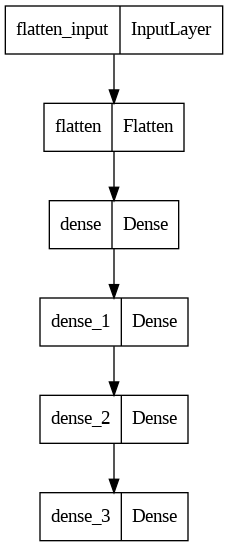

In [ ]:
import pydot
keras.utils.plot_model(model)

In [ ]:
weights, biases=model.layers[1].get_weights()

In [ ]:
weights

array([[ 0.03607164,  0.01494598, -0.04248827, ...,  0.03945249,
        -0.05187227, -0.05408023],
       [-0.0666317 ,  0.0119938 ,  0.01558691, ...,  0.05368526,
         0.03294378, -0.02205541],
       [ 0.00412018, -0.02770581, -0.06778123, ..., -0.0146254 ,
        -0.00236531, -0.06640854],
       ...,
       [-0.05676108, -0.04122225,  0.03028136, ...,  0.06871501,
        -0.02183342, -0.02202746],
       [ 0.05902547,  0.00758082,  0.00233996, ..., -0.03879867,
         0.04505822,  0.04389099],
       [ 0.02210695, -0.03274938,  0.04683917, ..., -0.06998248,
        -0.05040508, -0.02693115]], dtype=float32)

In [ ]:
weights.shape

(784, 392)

In [ ]:
biases.shape

(392,)

In [ ]:
np.random.seed(42)

In [ ]:
np.random.rand(5)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [ ]:
Trained_model=model.fit(xtrain,ytrain,epochs=30,validation_data=(xvalid,yvalid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7145 - accuracy: 0.7621 - val_loss: 0.5107 - val_accuracy: 0.8244
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4691 - accuracy: 0.8357 - val_loss: 0.4186 - val_accuracy: 0.8578
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4243 - accuracy: 0.8494 - val_loss: 0.4244 - val_accuracy: 0.8544
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3956 - accuracy: 0.8598 - val_loss: 0.4167 - val_accuracy: 0.8506
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3728 - accuracy: 0.8667 - val_loss: 0.3741 - val_accuracy: 0.8706
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3566 - accuracy: 0.8728 - val_loss: 0.3488 - val_accuracy: 0.8782
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3423 - accuracy: 0.8777 - val_loss: 0.3516 - val_accuracy

In [ ]:
Trained_model.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
Trained_model.history

{'loss': [0.7145155668258667,
  0.46908825635910034,
  0.4242609739303589,
  0.3955545127391815,
  0.3728249669075012,
  0.3566410541534424,
  0.3423275947570801,
  0.3293112516403198,
  0.31885814666748047,
  0.3094175159931183,
  0.2994310259819031,
  0.2913188934326172,
  0.28399190306663513,
  0.2760865390300751,
  0.2683849036693573,
  0.2629002332687378,
  0.2554139792919159,
  0.2503127455711365,
  0.24474912881851196,
  0.23910999298095703,
  0.23348939418792725,
  0.22736598551273346,
  0.22214464843273163,
  0.21842284500598907,
  0.21285346150398254,
  0.20802125334739685,
  0.2029552310705185,
  0.1989671289920807,
  0.19358941912651062,
  0.18924760818481445],
 'accuracy': [0.762109100818634,
  0.8357090950012207,
  0.849399983882904,
  0.859781801700592,
  0.8667091131210327,
  0.8727818131446838,
  0.8776545524597168,
  0.8801090717315674,
  0.8838545680046082,
  0.8878909349441528,
  0.8911818265914917,
  0.8931999802589417,
  0.8963636159896851,
  0.8984000086784363,
 

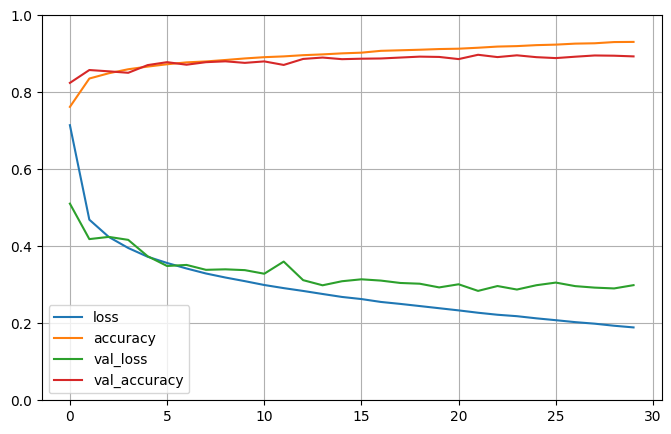

In [ ]:
import pandas as pd
pd.DataFrame(Trained_model.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.3344 - accuracy: 0.8841


[0.33436107635498047, 0.8841000199317932]

In [ ]:
xtest_new=xtest[:3]
y_prob=model.predict(xtest_new)
y_prob.round(3)

1/1 [==============================] - 0s 17ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.003, 0.   ,
        0.996],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [ ]:
y_pred=np.argmax(y_prob,axis=1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(classname)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U10')